In [1]:
import numpy as np
import pandas as pd
import plotly
import plotly.figure_factory as ff
import plotly.graph_objs as go
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

from sklearn.linear_model import SGDClassifier

In [2]:
data = pd.read_csv('task_b.csv')
data.head(2)

,index,f1,f2,f3,y
0,0,-195.871045,-14843.084171,5.532140,1.0
1,1,-1217.183964,-4068.124621,4.416082,1.0


In [3]:
data=data.iloc[:,1:]
data.head(2)

,f1,f2,f3,y
0,-195.871045,-14843.084171,5.532140,1.0
1,-1217.183964,-4068.124621,4.416082,1.0


In [4]:
data.corr()['y']

f1    0.067172
f2   -0.017944
f3    0.839060
y     1.000000
Name: y, dtype: float64

In [5]:
data.std()

f1      488.195035
f2    10403.417325
f3        2.926662
y         0.501255
dtype: float64

In [6]:
X=data[['f1','f2','f3']].values
Y=data['y'].values
print(X.shape)
print(Y.shape)

(200, 3)
(200,)


# What if our features are with different variance 

<pre>
* <b>As part of this task you will observe how linear models work in case of data having feautres with different variance</b>
* <b>from the output of the above cells you can observe that var(F2)>>var(F1)>>Var(F3)</b>

> <b>Task1</b>:
    1. Apply Logistic regression(SGDClassifier with logloss) on 'data' and check the feature importance

In [7]:
classifier = SGDClassifier(loss = 'log')
classifier.fit(X, Y)
print(classifier.coef_, classifier.intercept_)

[[  6655.94462442 -20423.59407194   9744.7106036 ]] [-272.53480957]


        2. Apply SVM(SGDClassifier with hinge) on 'data' and check the feature importance

In [8]:
classifier = SGDClassifier(loss = 'hinge')
classifier.fit(X, Y)
print(classifier.coef_, classifier.intercept_)

[[ 10111.10306935 -19817.74705457   9651.04081383]] [67.49377738]


> <b>Task2</b>:

In [9]:
data.head(2)

,f1,f2,f3,y
0,-195.871045,-14843.084171,5.532140,1.0
1,-1217.183964,-4068.124621,4.416082,1.0


In [10]:
standardized_data = pd.DataFrame(StandardScaler().fit_transform(data), columns=['f1','f2','f3','y'])
standardized_data.std()

f1    1.002509
f2    1.002509
f3    1.002509
y     1.002509
dtype: float64

In [11]:
X=standardized_data[['f1','f2','f3']].values
Y=standardized_data['y'].values


     1. Apply Logistic regression(SGDClassifier with logloss) on 'data' after standardization 
        i.e standardization(data, column wise): (column-mean(column))/std(column) and check the feature importance    

[[-3.22483237  0.82236633 13.44012765]] [0.6849282]


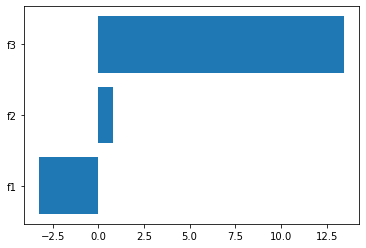

In [12]:
# classifier = SGDClassifier(loss = 'log')
# classifier.fit(X, Y)
# print(classifier.coef_, classifier.intercept_)

# [[ 13006.30822933 -15063.39797765  10270.60216367]] [67.49644398]


from matplotlib import pyplot as plt

def f_importances(coef, names):
    imp = coef[0]
    imp,names = zip(*sorted(zip(imp,names)))
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.show()

classifier = SGDClassifier(loss = 'log')
classifier.fit(X, Y)
print(classifier.coef_, classifier.intercept_)

f_importances(classifier.coef_, ['f1','f2','f3'])

# The weights obtained from svm.coef_ represent the vector coordinates which are orthogonal to the hyperplane 
# and their direction indicates the predicted class

# [[  6655.94462442 -20423.59407194   9744.7106036 ]] [-272.53480957]

     2. Apply SVM(SGDClassifier with hinge) on 'data' after standardization 
        i.e standardization(data, column wise): (column-mean(column))/std(column) and check the feature importance

   </pre>

[[-5.7610467  -3.81709213 27.64949897]] [-1.12383051]


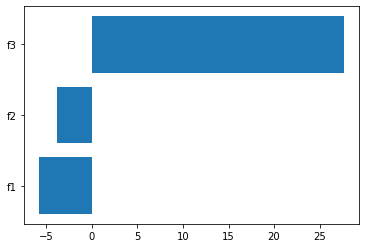

In [14]:
# classifier = SGDClassifier(loss = 'hinge')
# classifier.fit(X, Y)
# print(classifier.coef_, classifier.intercept_)


from matplotlib import pyplot as plt

def f_importances(coef, names):
    imp = coef[0]
    imp,names = zip(*sorted(zip(imp,names)))
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.show()

classifier = SGDClassifier(loss = 'hinge')
classifier.fit(X, Y)
print(classifier.coef_, classifier.intercept_)

f_importances(classifier.coef_, ['f1','f2','f3'])

# The weights obtained from svm.coef_ represent the vector coordinates which are orthogonal to the hyperplane 
# and their direction indicates the predicted class

# [[ 10111.10306935 -19817.74705457   9651.04081383]] [67.49377738]

Summary:-
  

When data is scaled or standardized, the feature importance is inversely dependent on standard deviation (variance) within the data. This is desired as features which have outliers are expected to have more variance and hence should be given less importance.